In [1]:
import pandas as pd
import string
import nltk
import re
import unidecode
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from gensim.models import Phrases

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shahb\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\shahb\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [5]:
# pre processing resume data set
resumes = pd.read_csv(r"./UpdatedResumeDataSet.csv")

def remove_punc(corpus):
    punc_free = "".join([i for i in corpus if i not in string.punctuation])
    return punc_free

def tokenization(corpus):
    tokens = re.split('W+',corpus)
    return tokens

def remove_stopwords(corpus):
    output = [i for i in corpus if i not in stopwords]
    return output

wordnet_lemmatizer = WordNetLemmatizer()

def lemmization(corpus):
    lemm = [wordnet_lemmatizer.lemmatize(word) for word in corpus]
    return lemm

def cleanResume(resumeText):
    resumeText = re.sub('httpS+s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^x00-x7f]',r' ', resumeText) 
    resumeText = re.sub('s+', ' ', resumeText)  # remove extra whitespace
    return resumeText

resumes['cleaned_resume'] = resumes.Resume.apply(lambda x: cleanResume(x))

# del resumes["Category"]
del resumes["Resume"]

resumes['cleaned_resume'] = resumes['cleaned_resume'].apply(lambda x:remove_punc(x))
resumes['cleaned_resume'] = resumes['cleaned_resume'].apply(lambda x:x.lower())
resumes['cleaned_resume'] = resumes['cleaned_resume'].apply(lambda x:tokenization(x))
resumes['cleaned_resume'] = resumes['cleaned_resume'].apply(lambda x:remove_stopwords(x))
resumes['cleaned_resume'] = resumes['cleaned_resume'].apply(lambda x:lemmization(x))
resumes.head()

,Category,cleaned_resume
0,Data Science,[skill programming language p thon panda...
1,Data Science,[education detail ma 2013 to ma 2017 b e ...
2,Data Science,[area of intere t deep learning control s t...
3,Data Science,[skill r p thon sap hana tabl...
4,Data Science,[education detail mca ymcaust faridaba...


In [6]:
resumes['cleaned_resume']

0      [skill    programming language   p thon  panda...
1      [education detail    ma  2013 to ma  2017 b e ...
2      [area  of intere t deep learning  control s  t...
3      [skill      r     p thon     sap hana     tabl...
4      [education detail     mca   ymcaust   faridaba...
                             ...                        
957    [computer skill       proficient in ms office ...
958    [    willingne  to a ept the challenge       p...
959    [personal skills     quick learner      eagern...
960    [computer skills   software knowledge ms power...
961    [skill set os window  xp 7 8 8 1 10 databa e m...
Name: cleaned_resume, Length: 962, dtype: object

                     Category  cleaned_resume
0              Java Developer              84
1                     Testing              70
2             DevOps Engineer              55
3            Python Developer              48
4               Web Designing              45
5                          HR              44
6                      Hadoop              42
7                Data Science              40
8          Operations Manager              40
9                       Sales              40
10                 Blockchain              40
11              ETL Developer              40
12        Mechanical Engineer              40
13                       Arts              36
14                   Database              33
15     Electrical Engineering              30
16         Health and fitness              30
17                        PMO              30
18           Business Analyst              28
19           DotNet Developer              28
20         Automation Testing     

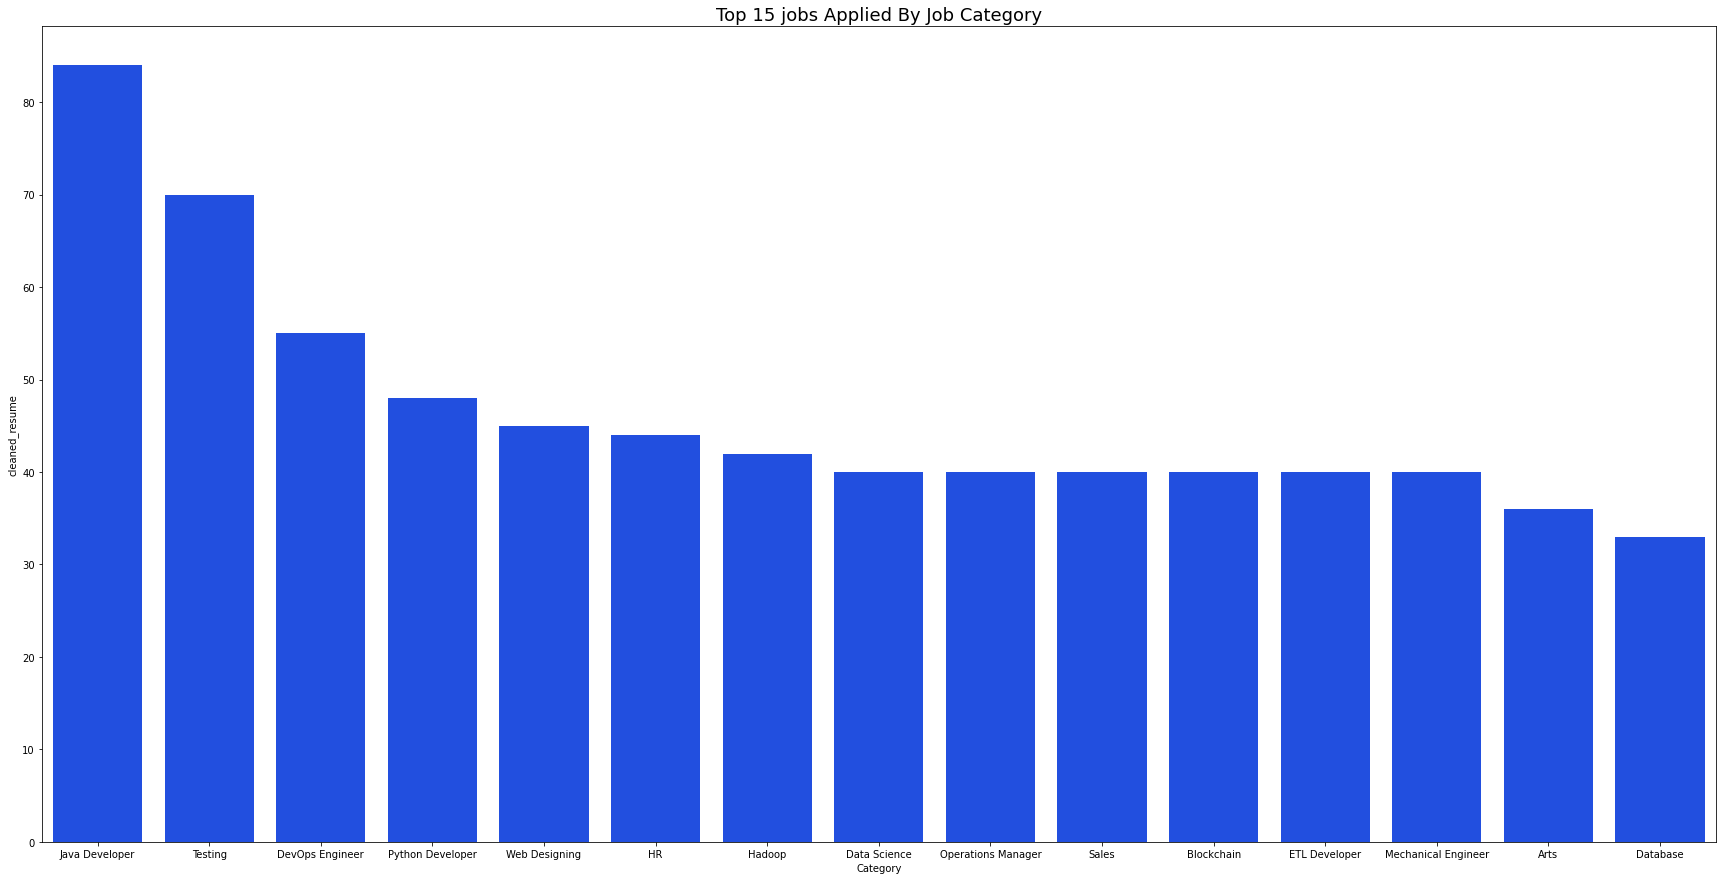

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(30, 15))

#Dataset relating to recruiters
count_resume= resumes.groupby('Category').count()
rec_df = resumes.groupby('Category').count().sort_values(by='cleaned_resume', ascending=False).reset_index()[['Category', 'cleaned_resume']].copy()
print(rec_df)


# Plot the total crashes
sns.set_color_codes("bright")
sns.barplot(x="Category", y="cleaned_resume", data=rec_df.loc[0:14,:],
            label="Total", color="b")

plt.title('Top 15 jobs Applied By Job Category', fontsize=18);

           Category  cleaned_resume
Role_Type                          
Business        186             186
Other           228             228
STEM            548             548


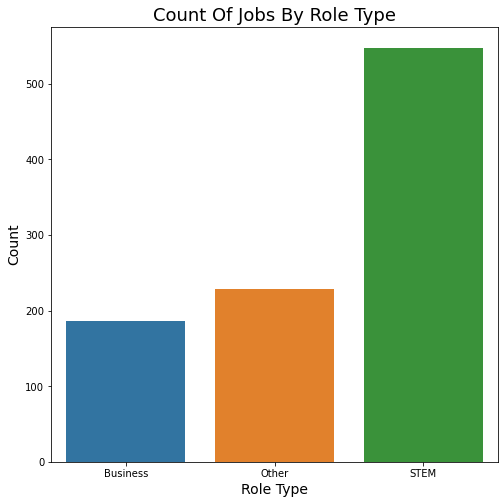

In [54]:
# Function to return the type of role based on keywords in the title.
def role_type(x):
    if 'Advocate' in x:
        return 'Business'
    elif 'Business' in x:
        return 'Business'
    elif 'SAP' in x:
        return 'Business'
    elif 'HR' in x:
        return 'Business'
    elif 'PMO' in x:
        return 'Business'
    elif 'Sales' in x:
        return 'Business'
    elif 'Python' in x:
        return 'STEM'
    elif 'Java' in x:
        return 'STEM'
    elif 'Database' in x:
        return 'STEM'
    elif 'Web' in x:
        return 'STEM'
    elif 'Developer' in x:
        return 'STEM'
    elif 'Engineer' in x:
        return 'STEM'
    elif 'Testing' in x:
        return 'STEM'
    else:
        return 'Other'
    
resumes['Role_Type'] = resumes['Category'].apply(role_type)
print(resumes.groupby('Role_Type').count())
job_df = resumes.groupby('Role_Type').count().reset_index()[['Role_Type', 'Category']]

f, ax = plt.subplots(figsize=(8, 8))

sns.barplot(x='Role_Type', y='Category', data=job_df)

ax.set_title('Count Of Jobs By Role Type', fontsize=18)
ax.set_xlabel('Role Type', fontsize=14)
ax.set_ylabel('Count', fontsize=14);